In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import rasterio as rio
from rasterio.crs import CRS
from rasterio.warp import transform_geom
from rasterio.merge import merge
from shapely.geometry import shape, mapping, Polygon, MultiPolygon
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

In [3]:
def read_band_SAR_image(img_path):
    with rio.open(img_path) as src:
        VV = src.read(1)
        VH = src.read(3)
        crs = src.crs
        trans = src.transform
        bounds = src.bounds
        return [VV, VH, crs, trans, bounds]

In [4]:
def show_img1(img_band, bounds):
    plt.rcParams['figure.figsize'] = 10, 10
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(img_band, aspect=1.0, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

In [5]:
def rgb_img(img_band_VV, img_band_VH):
    dif = img_band_VV - img_band_VH
    false_color_raster = np.concatenate(
        [dif[..., np.newaxis],
         img_band_VH[..., np.newaxis],
         img_band_VV[..., np.newaxis]], axis=-1)
    false_color_raster = (false_color_raster / np.max(false_color_raster) * 255).astype(np.uint8)
    return false_color_raster

In [6]:
def show_img(img_path):
    VV,VH,crs,trans,bounds = read_band_SAR_image(img_path)
    false_color_raster = rgb_img(VV, VH)
    show_img1(false_color_raster, bounds)

In [7]:
def displayImageByMonth(month, year, place):
    img_path = str(month) + '/' + place + '_' + str(year) + str(month) + '.tif'
    show_img(img_path)

# December

/home/lamductan/anaconda3/envs/libgeo/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  


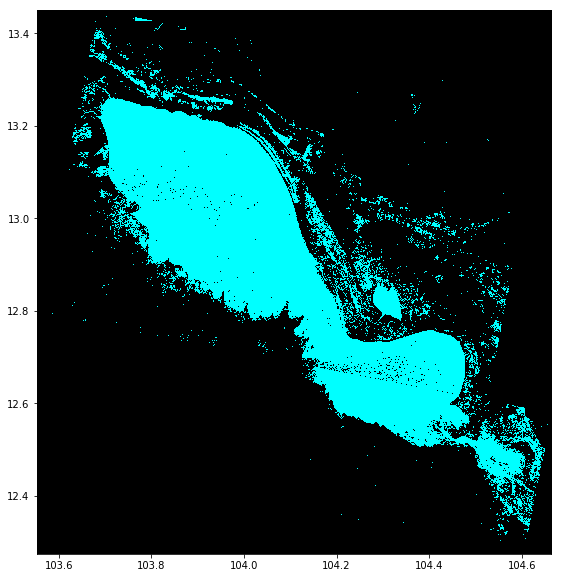

In [8]:
displayImageByMonth(12,2017,'Tonlesap')

# November

/home/lamductan/anaconda3/envs/libgeo/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  


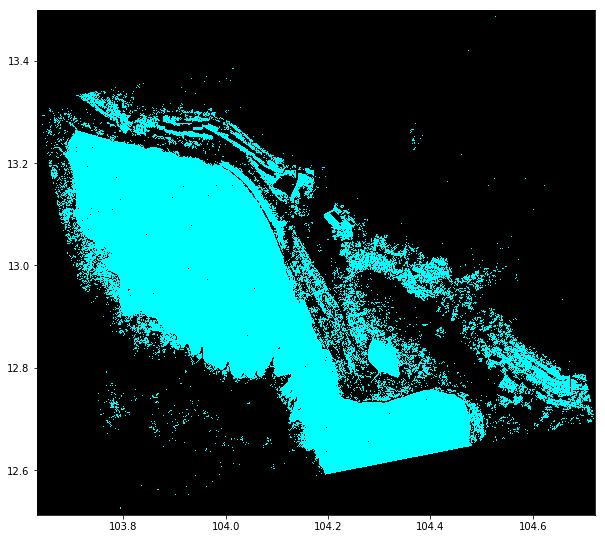

In [9]:
displayImageByMonth(11,2017,'Tonlesap')

# October

/home/lamductan/anaconda3/envs/libgeo/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  


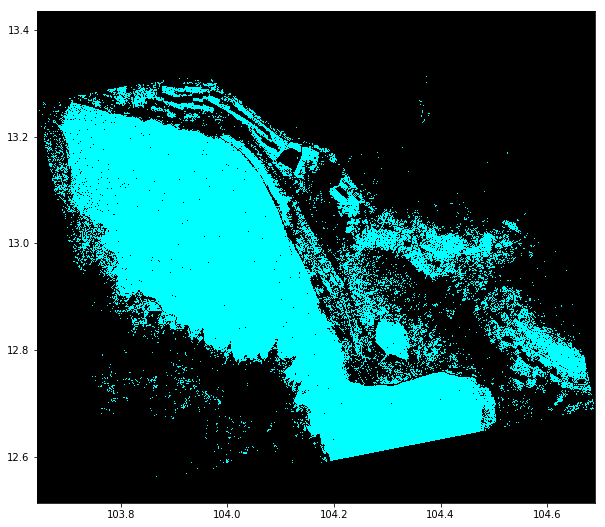

In [10]:
displayImageByMonth(10, 2017, 'Tonlesap')